## Practicing Neural Networks with the fashion MNIST dataset
---------------------------------

### Loading the fashion MNIST data 
The data can be loaded directly from keras (`keras.datasets.fashion_mnist`).

```python
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# returns 4 numpy arrays: 2 training sets and 2 test sets
# images: 28x28 arrays, pixel values: 0 to 255
# labels: array of integers: 0 to 9 => class of clothings
# Training set: 60,000 images, Testing set: 10,000 images

# class names are not included, need to create them to plot the images  
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
```

In [14]:
from tensorflow.keras.datasets import mnist
import keras

In [24]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# returns 4 numpy arrays: 2 training sets and 2 test sets
# images: 28x28 arrays, pixel values: 0 to 255
# labels: array of integers: 0 to 9 => class of clothings
# Training set: 60,000 images, Testing set: 10,000 images

# class names are not included, need to create them to plot the images  
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

-------------------
### Data Exploration

- **Task 1:** Explore the pictures and labels. 
    - Try displaying a picture of each class in jupyter.
    
    
- **Task 2:** Normalize the data to be between 0 and 1. 
    - Write down in a new markdown cell, **why** should we do this?

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

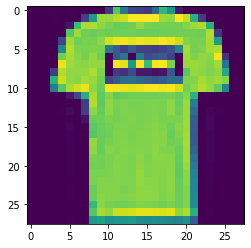

In [17]:
imgplot = plt.imshow(train_images[1])

In [19]:
from sklearn.preprocessing import minmax_scale

In [32]:
test_images = test_images / 255
train_images = train_images / 255

----------------------
### Training NN model 

Step 1  -  Build the architecture

Step 2  -  Compile the model 

Step 3  -  Train the model

Step 4  -  Evaluate the model 

In [33]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

In [34]:
network = models.Sequential()
network.add(layers.Dense(784, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(784, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [35]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [36]:
train_labels = (to_categorical(train_labels))
test_labels = to_categorical(test_labels)

In [39]:
network.fit(train_images, train_labels, epochs=20, batch_size=1000)

Epoch 1/20
60/60 [==============================] - 1s 23ms/step - loss: 0.5189 - accuracy: 0.8132
Epoch 2/20
60/60 [==============================] - 1s 22ms/step - loss: 0.4925 - accuracy: 0.8244
Epoch 3/20
60/60 [==============================] - 1s 23ms/step - loss: 0.4728 - accuracy: 0.8324
Epoch 4/20
60/60 [==============================] - 1s 23ms/step - loss: 0.4566 - accuracy: 0.8379
Epoch 5/20
60/60 [==============================] - 1s 24ms/step - loss: 0.4391 - accuracy: 0.8442
Epoch 6/20
60/60 [==============================] - 2s 27ms/step - loss: 0.4282 - accuracy: 0.8470
Epoch 7/20
60/60 [==============================] - 1s 25ms/step - loss: 0.4185 - accuracy: 0.8499
Epoch 8/20
60/60 [==============================] - 1s 23ms/step - loss: 0.4132 - accuracy: 0.8520
Epoch 9/20
60/60 [==============================] - 1s 23ms/step - loss: 0.4053 - accuracy: 0.8556
Epoch 10/20
60/60 [==============================] - 1s 23ms/step - loss: 0.3956 - accuracy: 0.8590
Epoch 11/

In [40]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc, 'test_loss', test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.3931 - accuracy: 0.8590
test_acc: 0.859000027179718 test_loss 0.3930881917476654
